# Final Project, Feature Selection
[Santander Customer Satisfaction](https://www.kaggle.com/c/santander-customer-satisfaction) research

## Load open source libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from pandas.tools.plotting import radviz
%matplotlib inline

## Define useful functions

In [3]:
def get_column_info(df,column):
    # print general info about column
    print df[column].describe()
    
    # show histogram amd box plot
    plt.figure()
    df[df.TARGET==0][column].plot(kind="hist", label="satisfied customers")
    df[df.TARGET==1][column].plot(kind="hist", label="unsatisfied customers")
    plt.legend();
    
    plt.figure()
    df[df.TARGET==0][column].plot(kind="kde", label="satisfied customers")
    df[df.TARGET==1][column].plot(kind="kde", label="unsatisfied customers")
    plt.legend();
    
    plt.figure()
    df[column].plot(kind='box')

## Load datasets

In [4]:
df_train = pd.read_csv("data/clean_train.csv")
df_train.shape

(76020, 308)

In [5]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39205.170000,0
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49278.030000,0
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67333.770000,0
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,64007.970000,0
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0


In [6]:
df_test = pd.read_csv("data/clean_test.csv")
df_test.shape

(75818, 307)

In [7]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40532.10
1,5,2,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45486.72
2,6,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46993.95
3,7,2,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,187898.61
4,9,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,73649.73


## Feature selection

In [8]:
# train dataset
y_train = df_train['TARGET']
X_train = df_train.drop(['ID','TARGET'], axis=1)

# test dataset
id_test = df_test['ID']
X_test = df_test.drop(['ID'], axis=1)

In [9]:
# use GradientBoosting to find important features
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print gbc

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [17]:
# get important columns sorted
important_columns = gbc.feature_importances_
indices = np.argsort(important_columns)[::-1]

# get 8 the most important features
top = []
for column in range(0,8):
    top.append(X_train.columns[indices[column]])
    
print "The most important features:\n", top

The most important features:
['saldo_var30', 'var15', 'var38', 'saldo_medio_var5_hace3', 'saldo_var8', 'num_var22_ult1', 'saldo_medio_var5_hace2', 'saldo_medio_var8_ult3']


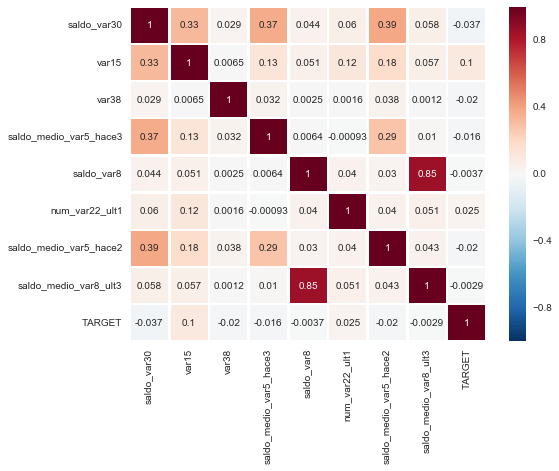

In [19]:
# visualize top features
top_features = df_train[top].join(df_train["TARGET"])
plt.figure(figsize=(8,6))
sns.heatmap(top_features.corr(), annot=True, linewidths=1.5)

I researched var15 and var38 columns in final_project_part_3_2_data_mining. Here I am going to look at other important features.

## saldo_var30

count      76020.000000
mean       13679.673658
std        63014.078142
min        -4942.260000
25%            0.000000
50%            3.000000
75%          235.995000
max      3458077.320000
Name: saldo_var30, dtype: float64


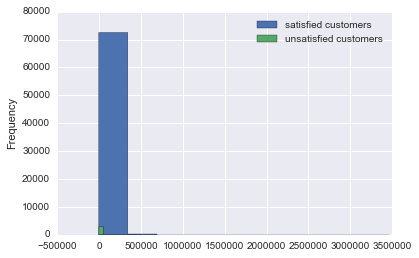

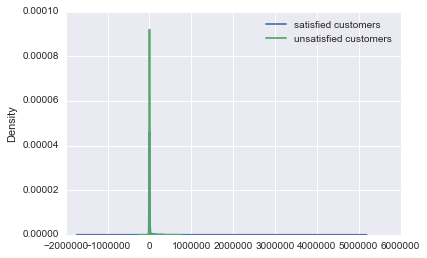

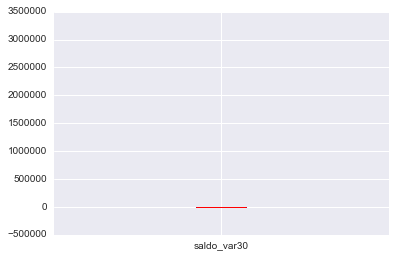

In [24]:
get_column_info(df_train,"saldo_var30")

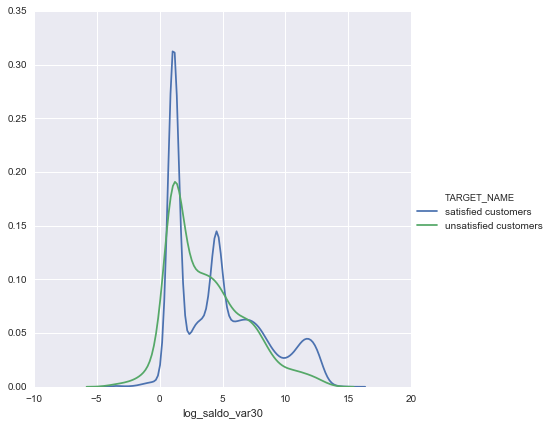

In [60]:
# improve the plot by making the x axis logarithmic
df_log = df_train
df_log["TARGET_NAME"] = df_log["TARGET"].apply(lambda x: "satisfied customers" if x == 0 else "unsatisfied customers")
df_log["log_saldo_var30"] = df_log.saldo_var30.map(np.log)
sns.FacetGrid(df_log, hue="TARGET_NAME", size=6).map(sns.kdeplot, "log_saldo_var30").add_legend();

## saldo_medio_var5_hace3

count      76020.000000
mean         891.365863
std         9888.597000
min           -8.040000
25%            0.000000
50%            0.990000
75%           12.217500
max      1542339.360000
Name: saldo_medio_var5_hace3, dtype: float64


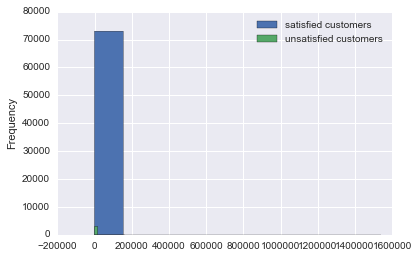

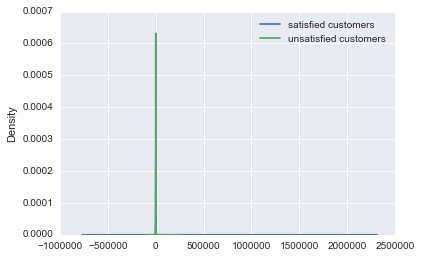

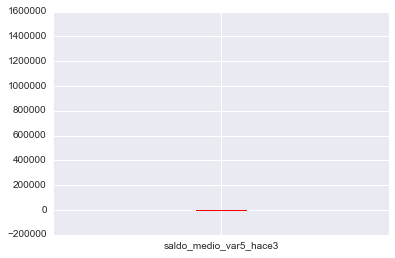

In [85]:
get_column_info(df_train,"saldo_medio_var5_hace3")

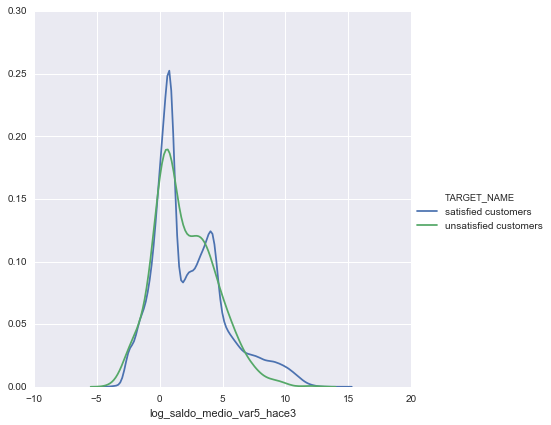

In [86]:
# improve the plot by making the x axis logarithmic
df_log["log_saldo_medio_var5_hace3"] = df_log.saldo_medio_var5_hace3.map(np.log)
sns.FacetGrid(df_log, hue="TARGET_NAME", size=6).map(sns.kdeplot, "log_saldo_medio_var5_hace3").add_legend();

## saldo_var8

count     76020.000000
mean        141.226784
std        2515.656302
min       -4942.260000
25%           0.000000
50%           0.000000
75%           0.000000
max      240045.000000
Name: saldo_var8, dtype: float64


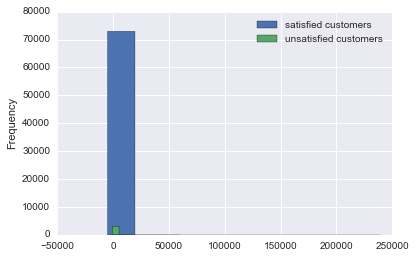

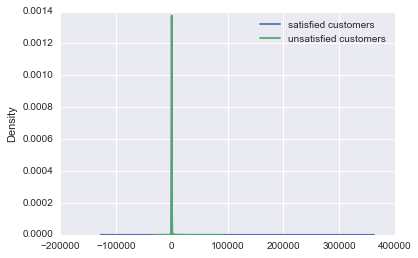

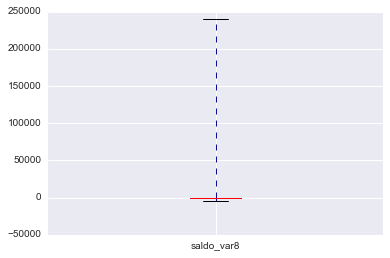

In [63]:
get_column_info(df_train,"saldo_var8")

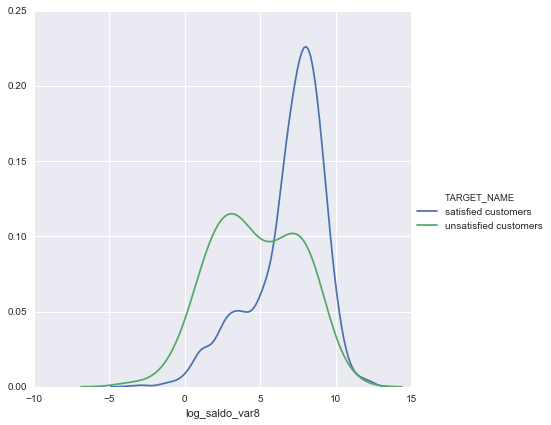

In [66]:
# improve the plot by making the x axis logarithmic
df_log["log_saldo_var8"] = df_log.saldo_var8.map(np.log)
sns.FacetGrid(df_log, hue="TARGET_NAME", size=6).map(sns.kdeplot, "log_saldo_var8").add_legend();

## num_var22_ult1

count    76020.000000
mean         0.560655
std          2.104410
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         96.000000
Name: num_var22_ult1, dtype: float64


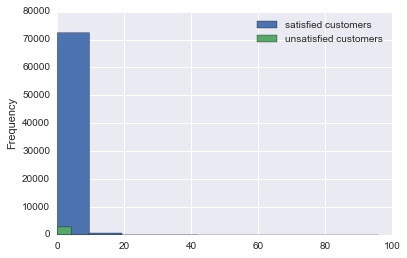

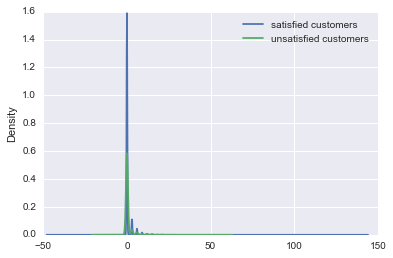

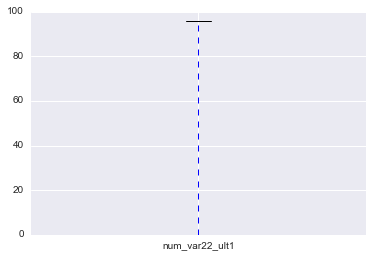

In [67]:
get_column_info(df_train,"num_var22_ult1")

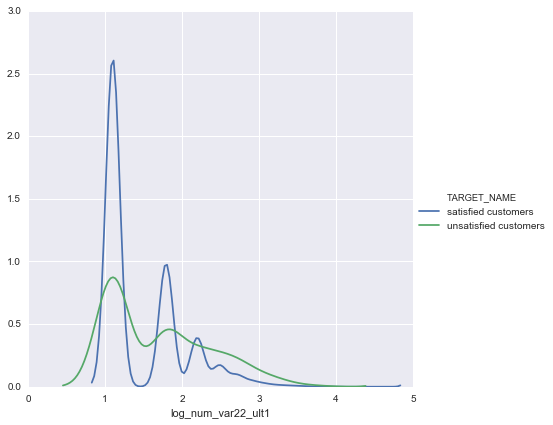

In [68]:
# improve the plot by making the x axis logarithmic
df_log["log_num_var22_ult1"] = df_log.num_var22_ult1.map(np.log)
sns.FacetGrid(df_log, hue="TARGET_NAME", size=6).map(sns.kdeplot, "log_num_var22_ult1").add_legend();

## saldo_medio_var5_hace2

count     76020.000000
mean       1579.135311
std       12148.452398
min        -128.370000
25%           0.000000
50%           3.000000
75%          90.000000
max      812137.260000
Name: saldo_medio_var5_hace2, dtype: float64


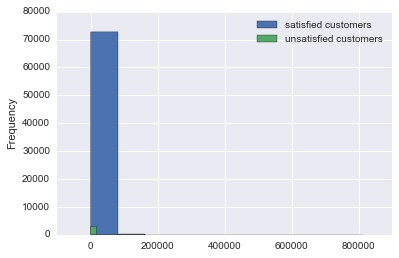

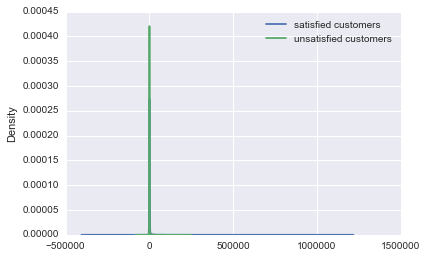

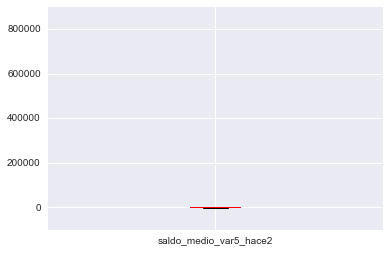

In [69]:
get_column_info(df_train,"saldo_medio_var5_hace2")

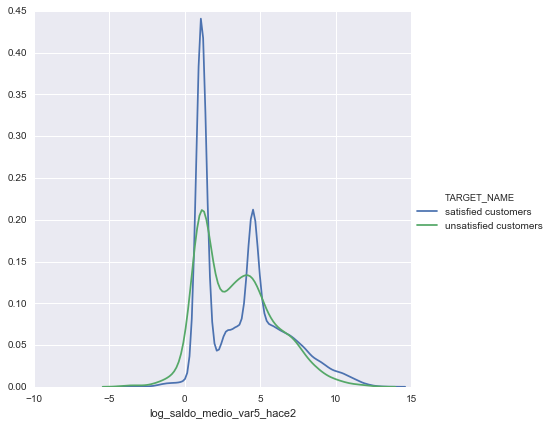

In [70]:
# improve the plot by making the x axis logarithmic
df_log["log_saldo_medio_var5_hace2"] = df_log.saldo_medio_var5_hace2.map(np.log)
sns.FacetGrid(df_log, hue="TARGET_NAME", size=6).map(sns.kdeplot, "log_saldo_medio_var5_hace2").add_legend();

## saldo_medio_var8_ult3

count     76020.000000
mean        110.026575
std        1935.305713
min       -1844.520000
25%           0.000000
50%           0.000000
75%           0.000000
max      177582.000000
Name: saldo_medio_var8_ult3, dtype: float64


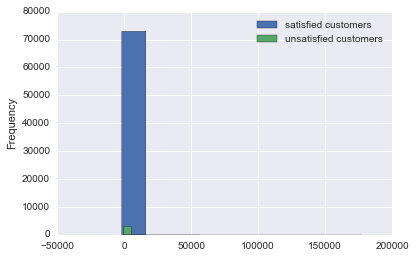

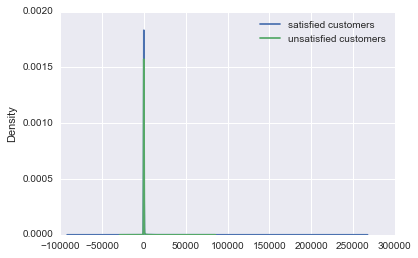

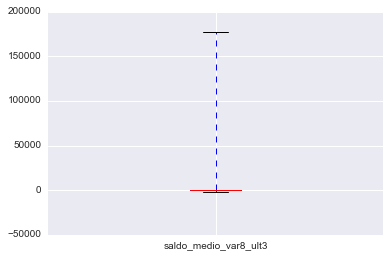

In [71]:
get_column_info(df_train,"saldo_medio_var8_ult3")

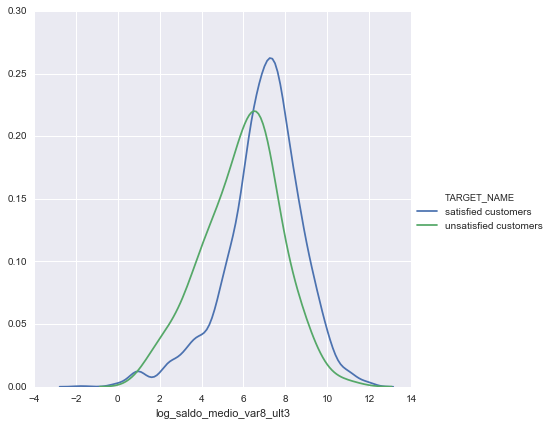

In [72]:
# improve the plot by making the x axis logarithmic
df_log["log_saldo_medio_var8_ult3"] = df_log.saldo_medio_var8_ult3.map(np.log)
sns.FacetGrid(df_log, hue="TARGET_NAME", size=6).map(sns.kdeplot, "log_saldo_medio_var8_ult3").add_legend();

## Explore top features together

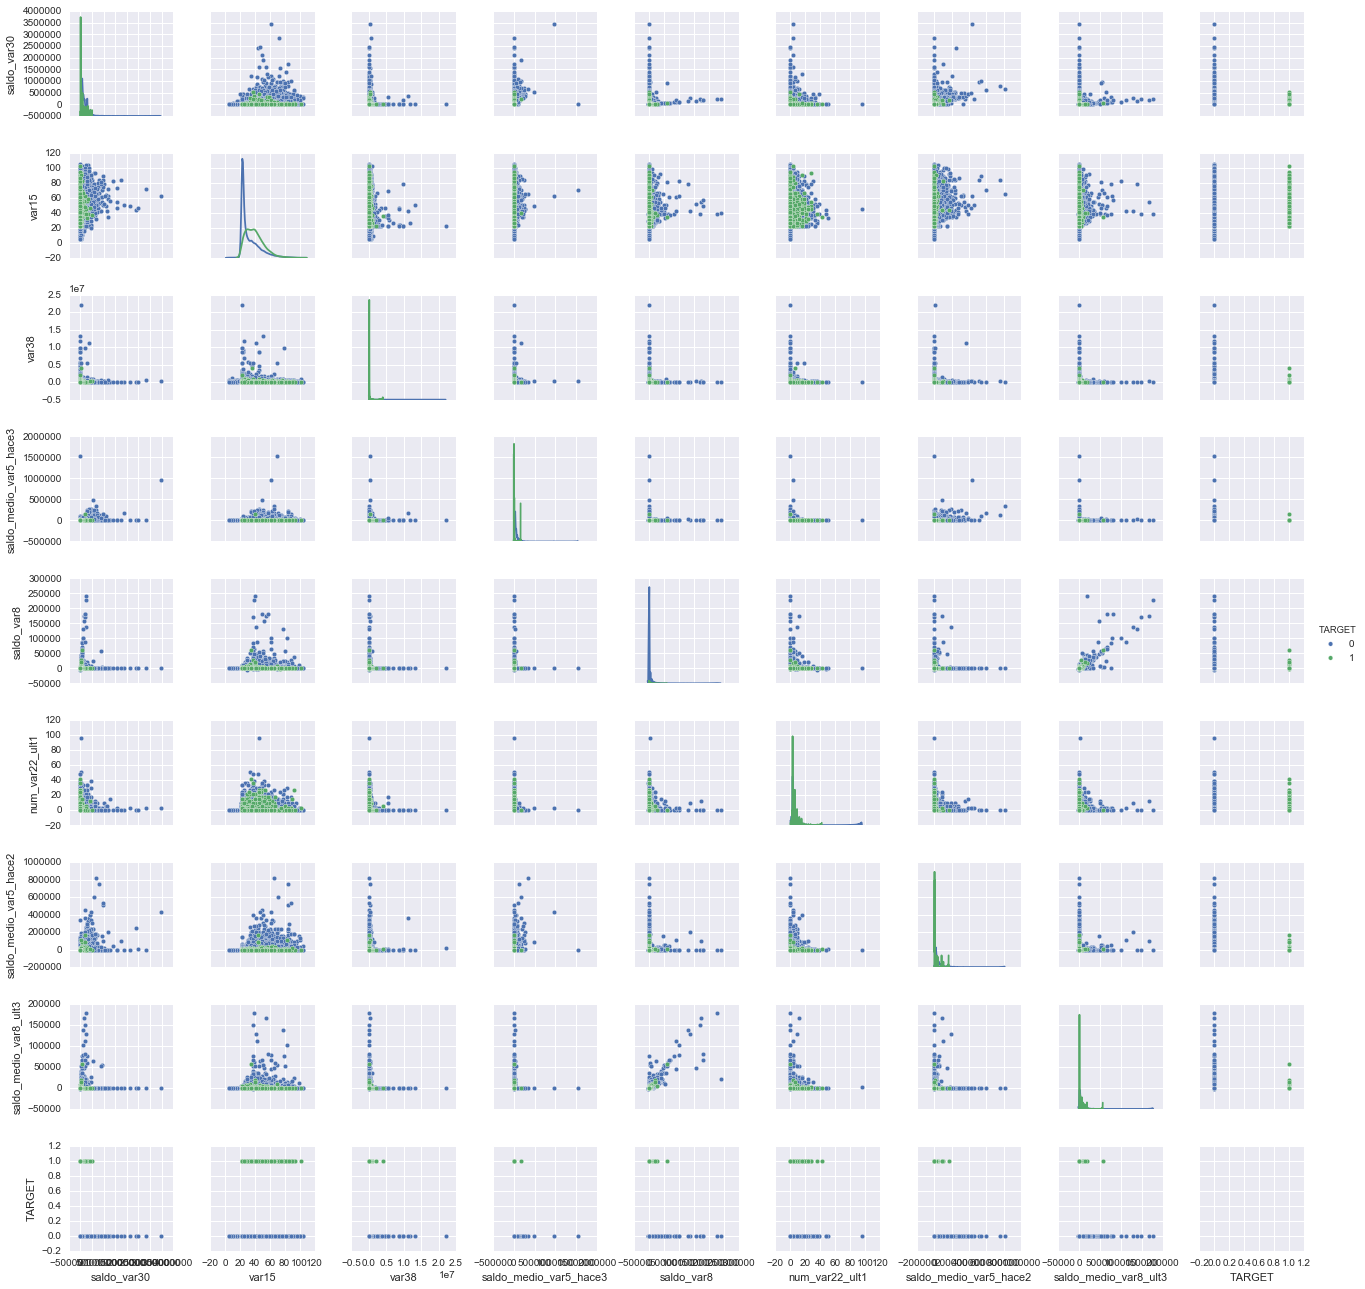

In [96]:
sns.pairplot(top_features, hue="TARGET", size=2, diag_kind="kde")

In [93]:
# improve the plots by making the x axis logarithmic
df_log["log_var38"] = df_log.var38.map(np.log)
f_list = ["log_saldo_var30","var15","log_var38","log_saldo_medio_var5_hace3","log_saldo_var8", "log_num_var22_ult1","log_saldo_medio_var5_hace2","log_saldo_medio_var8_ult3","TARGET_NAME"]
top_features_log = df_log[f_list]
top_features_log.shape

(76020, 9)

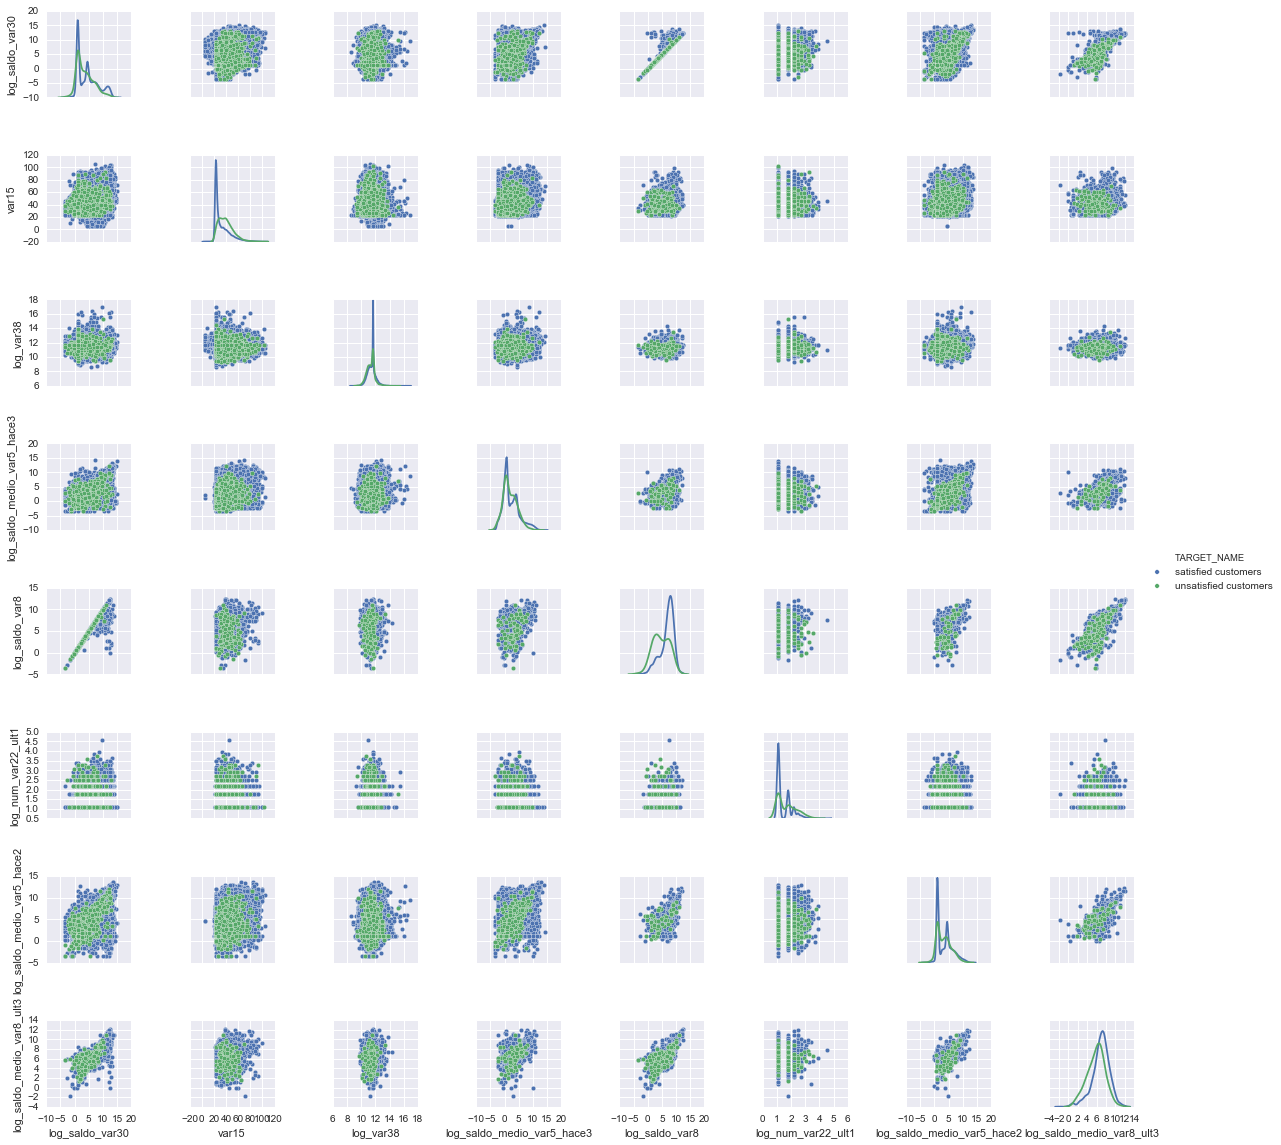

In [95]:
sns.pairplot(top_features_log, hue="TARGET_NAME", size=2, diag_kind="kde")

## RadViz vizualization

RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.

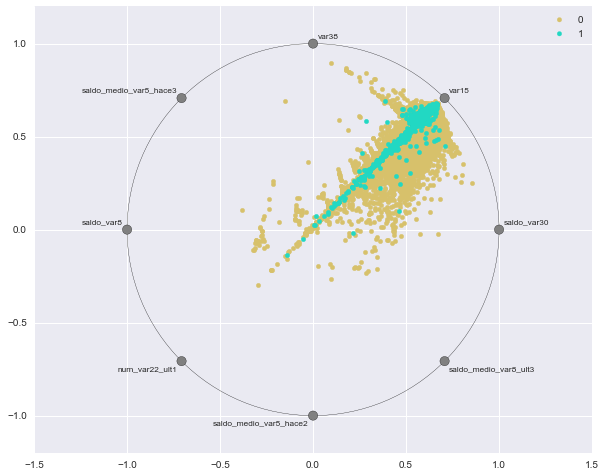

In [99]:
plt.figure(figsize=(10, 8))
radviz(top_features, "TARGET");